In [5]:
from google.colab import files
uploaded = files.upload()

Saving merged_df_cleaned.csv to merged_df_cleaned.csv


In [6]:
# Import dependencies
import numpy as np
import pandas as pd
%matplotlib inline

In [8]:
data = pd.read_csv('merged_df_cleaned.csv', encoding='cp1252')
data.head()

,responder_id,birth_year,gender,industry_desc,occupation_desc,organization_size,manage_others,household,years_at_job,metro_or_regional,...,if_no_covid_i_would_have_choice_about_rw,productivity_remote_vs_office,inperson_hours__commuting,inperson_hours__working,inperson_hours__personal_family_time,inperson_hours_domestic_responsibilities,remote_hours_commuting,remote_hours_working,remote_hours_personal_family_time,remote_hours_domestic_responsibilities
0,0,1972,Female,Other,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,...,Strongly disagree,much more productive,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0
1,1,1972,Male,Other,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,...,Somewhat agree,less productive,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0
2,2,1982,Male,Other,Managers,More than 200,Yes,One parent family with dependent children,More than 5 years,Metro,...,Somewhat agree,less productive,6.0,1.0,6.0,5.0,5.0,2.0,7.0,7.0
3,3,1987,Female,"Professional, Scientific and Technical Services",Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,Metro,...,Somewhat agree,same productivity,1.0,9.0,1.0,2.0,0.0,9.0,3.0,2.0
4,4,1991,Male,Other,Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,Metro,...,Strongly disagree,more productive,1.0,8.0,3.5,2.0,0.0,6.0,4.0,3.0


In [9]:
data.columns

Index(['responder_id', 'birth_year', 'gender', 'industry_desc',
       'occupation_desc', 'organization_size', 'manage_others', 'household',
       'years_at_job', 'metro_or_regional', 'Actual Remote Days',
       'org_encouraged_rw', 'org_prepared_for_rw', 'rw_is_common_at_org',
       'rw_permission_is_attainable', 'rw_collaboration_easy',
       'preferred_rw_percentage_2020', 'preferred_rw_percentage_future',
       'if_no_covid_employer_encourage_rw', 'if_no_covid_employer_support_rw',
       'if_no_covid_i_would_have_choice_about_rw',
       'productivity_remote_vs_office', 'inperson_hours__commuting',
       'inperson_hours__working', 'inperson_hours__personal_family_time',
       'inperson_hours_domestic_responsibilities', 'remote_hours_commuting',
       'remote_hours_working', 'remote_hours_personal_family_time',
       'remote_hours_domestic_responsibilities'],
      dtype='object')

In [10]:
data.rename(columns={'rw_percentage_2020': 'actual_remote_days'}, inplace=True)

## Age

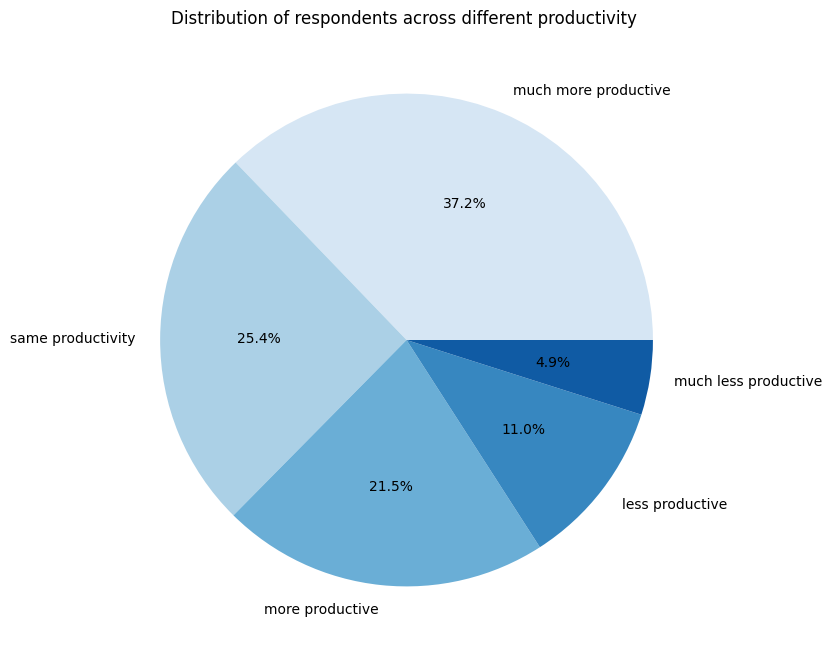

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Count the number of respondents for each productivity category
productivity_counts = data['productivity_remote_vs_office'].value_counts()

# Plotting the pie chart using both matplotlib and seaborn
plt.figure(figsize=(8, 8))
colors = sns.color_palette("Blues", len(productivity_counts))
plt.pie(productivity_counts, labels=productivity_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of respondents across different productivity ')
plt.show()


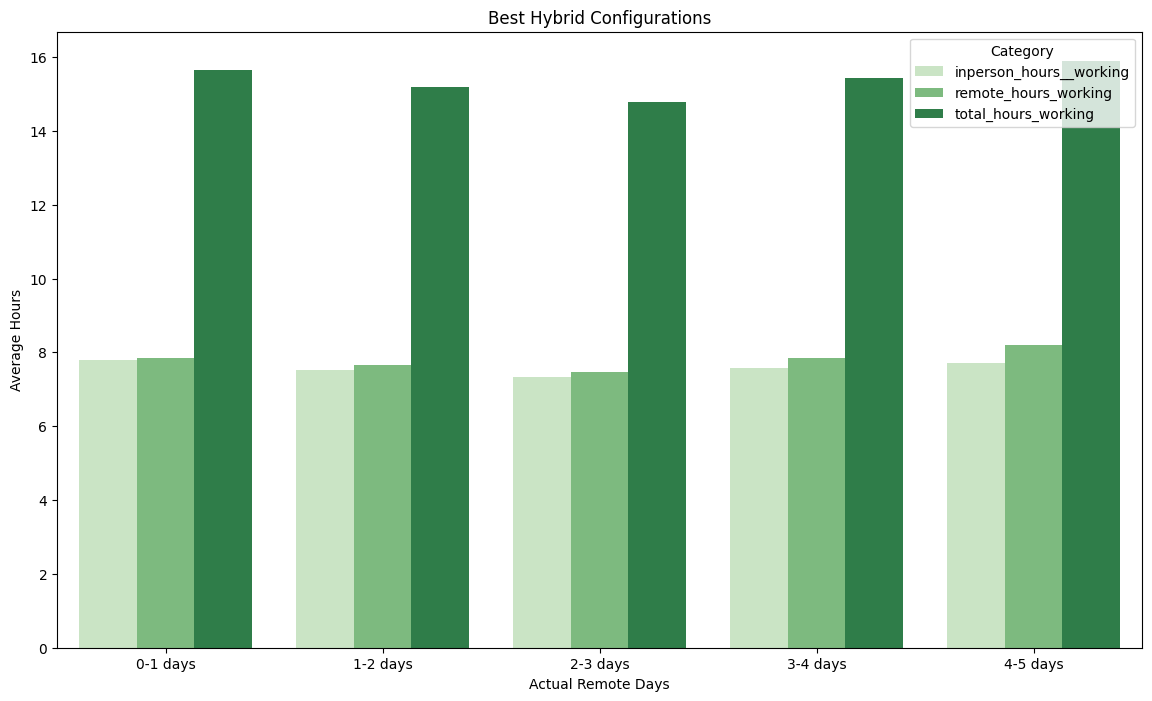

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Filtering numeric columns for the groupby operation to avoid issues with non-numeric data types
numeric_columns = ['inperson_hours__working', 'remote_hours_working']

# Calculating total hours
data['total_hours_working'] = data['remote_hours_working'] + data['inperson_hours__working']
numeric_columns.append('total_hours_working')

# Grouping data by actual remote days and calculating the mean for each numeric column
data_grouped = data.groupby('actual_remote_days')[numeric_columns].mean().reset_index()

# Melting the data for easier plotting
data_melted = data_grouped.melt(id_vars='actual_remote_days', value_vars=numeric_columns)

# Creating a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='actual_remote_days', y='value', hue='variable', data=data_melted, palette='Greens')
plt.title('Best Hybrid Configurations')
plt.xlabel('Actual Remote Days')
plt.ylabel('Average Hours')
plt.legend(title='Category', loc='upper right')
plt.show()


## Demographics

<ipython-input-18-04909f80e845>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_grouped = filtered_data.groupby(['age_group', 'gender']).size().unstack().fillna(0)


<Figure size 1400x800 with 0 Axes>

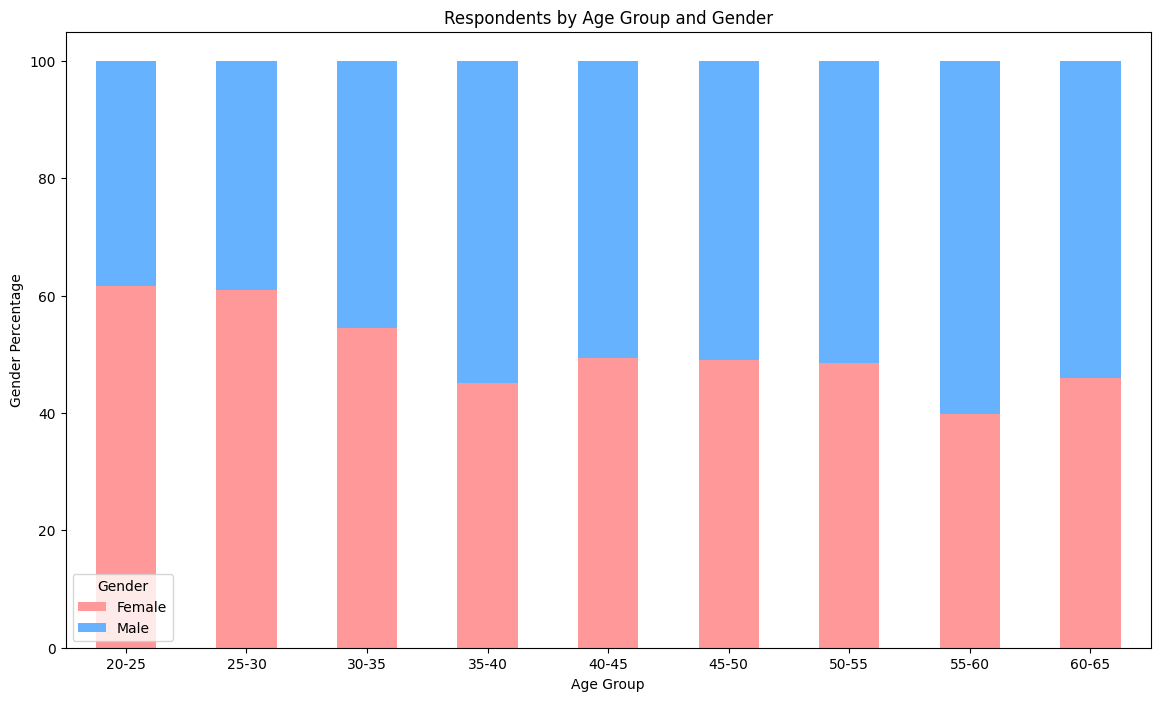

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the age of respondents
data['age'] = 2024 - data['birth_year']

# Define age bins and labels
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
labels = ['20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65']

# Bin the ages
data['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Filter relevant data and calculate percentages
filtered_data = data[data['gender'].isin(['Male', 'Female', 'Unknown'])]
age_gender_grouped = filtered_data.groupby(['age_group', 'gender']).size().unstack().fillna(0)
age_gender_percentage_grouped = age_gender_grouped.div(age_gender_grouped.sum(axis=1), axis=0) * 100

# Plot the data
plt.figure(figsize=(14, 8))
age_gender_percentage_grouped.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#FF9999', '#66B2FF', '#FFD700'])
plt.title('Respondents by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Gender Percentage')
plt.legend(title='Gender', loc='lower left')
plt.xticks(rotation=0)
plt.show()


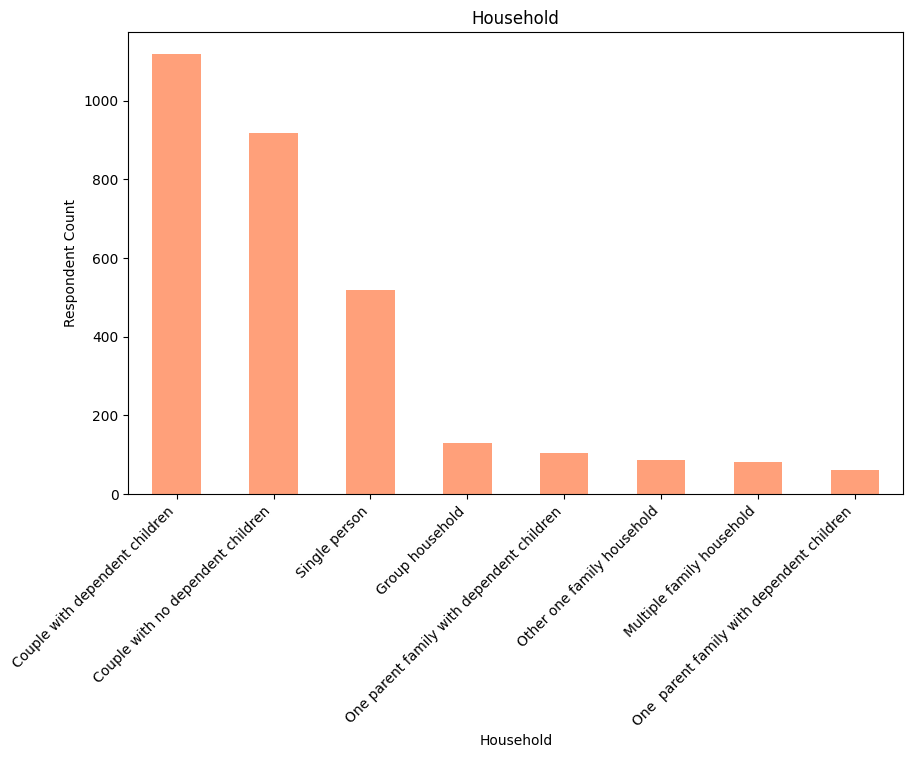

In [ ]:
# Create the bar chart for respondents by household category

# Grouping data by household and counting the number of respondents in each category
household_counts = data['household'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
household_counts.plot(kind='bar', color='#FFA07A')
plt.title('Household')
plt.xlabel('Household')
plt.ylabel('Respondent Count')
plt.xticks(rotation=45, ha='right')
plt.show()

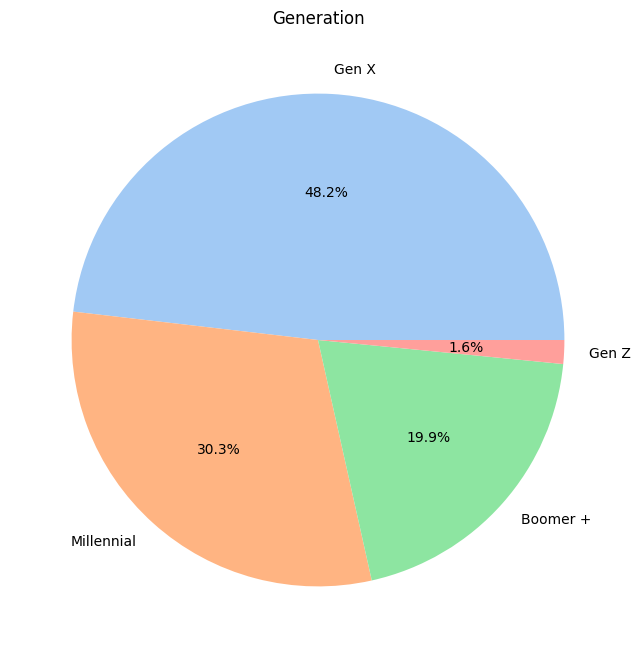

In [ ]:
import seaborn as sns

# Create a generation column based on age
def categorize_generation(age):
    if age < 25:
        return 'Gen Z'
    elif age < 40:
        return 'Millennial'
    elif age < 60:
        return 'Gen X'
    else:
        return 'Boomer +'

data['generation'] = data['age'].apply(categorize_generation)

# Count the number of respondents in each generation
generation_counts = data['generation'].value_counts()

# Plotting the pie chart using both matplotlib and seaborn
plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel")[0:4]
plt.pie(generation_counts, labels=generation_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Generation')
plt.show()

## Productivity analysis

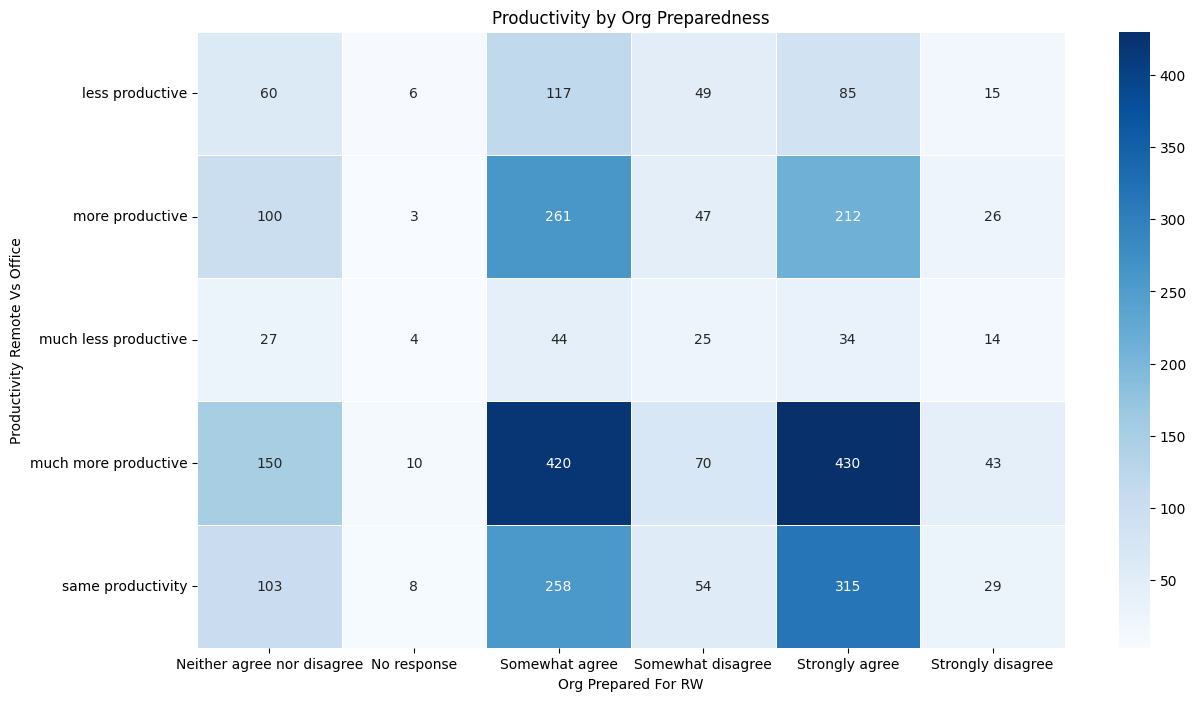

In [ ]:
# Preparing the data for the heatmap
pivot_data = data.pivot_table(
    values='responder_id',
    index='productivity_remote_vs_office',
    columns='org_prepared_for_rw',
    aggfunc='count',
    fill_value=0
)

# Plotting the heatmap using both matplotlib and seaborn
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Productivity by Org Preparedness')
plt.xlabel('Org Prepared For RW')
plt.ylabel('Productivity Remote Vs Office')
plt.show()

<Figure size 1400x800 with 0 Axes>

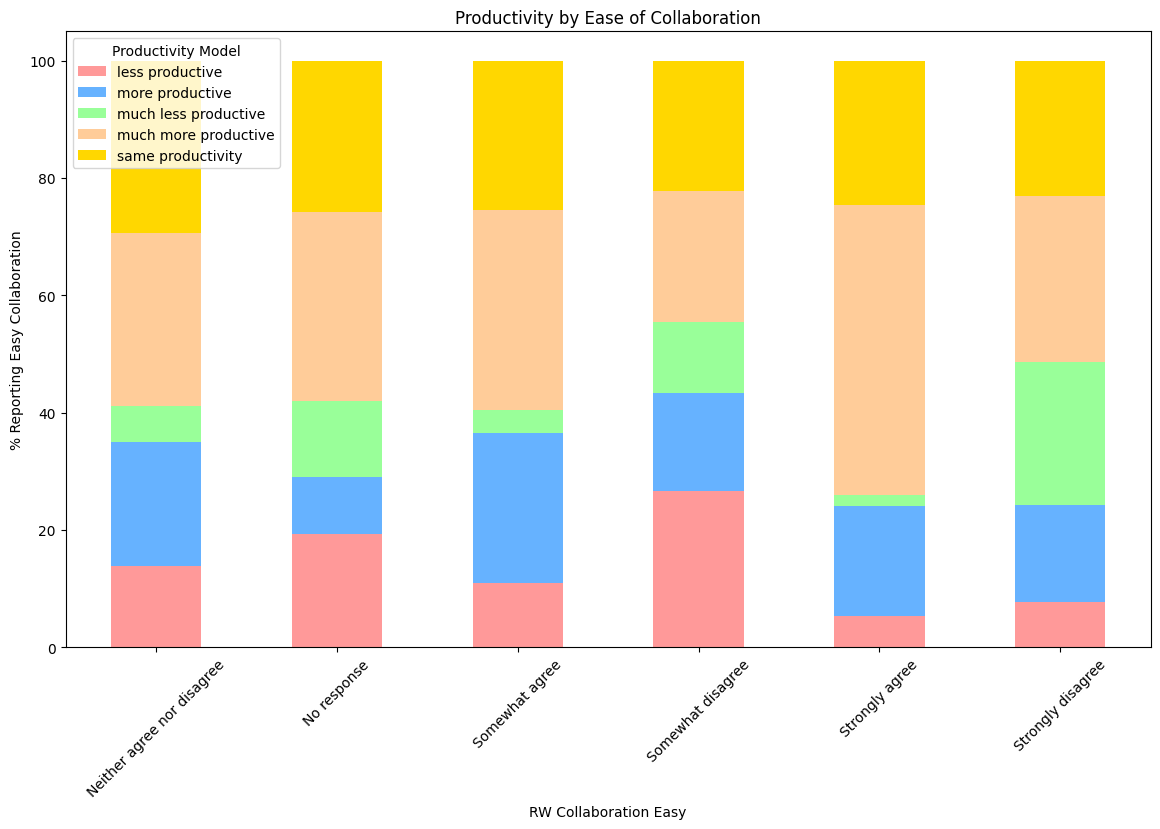

In [ ]:
# Creating the dataset for the bar plot with more differentiating colors
collaboration_data = data.pivot_table(
    values='responder_id',
    index='productivity_remote_vs_office',
    columns='rw_collaboration_easy',
    aggfunc='count',
    fill_value=0
)

# Normalizing the data to get the percentage
collaboration_data_percent = collaboration_data.div(collaboration_data.sum(axis=0), axis=1) * 100

# Define a color palette with more differentiating colors
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700']

# Plotting the stacked bar chart
plt.figure(figsize=(14, 8))
collaboration_data_percent.T.plot(kind='bar', stacked=True, figsize=(14, 8), color=colors)
plt.title('Productivity by Ease of Collaboration')
plt.xlabel('RW Collaboration Easy')
plt.ylabel('% Reporting Easy Collaboration')
plt.legend(title='Productivity Model', loc='upper left')
plt.xticks(rotation=45)
plt.show()

<Figure size 1400x800 with 0 Axes>

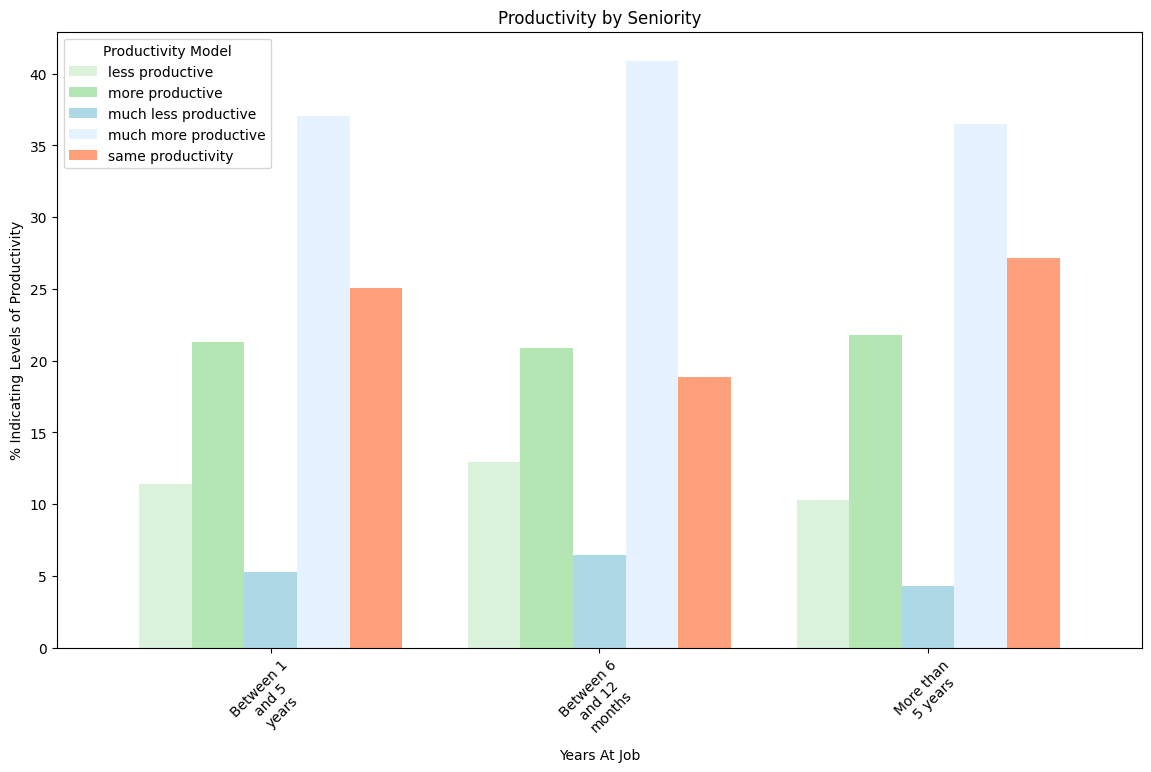

In [ ]:
import textwrap
# Creating the dataset for the bar plot
seniority_data = data.pivot_table(
    values='responder_id',
    index='years_at_job',
    columns='productivity_remote_vs_office',
    aggfunc='count',
    fill_value=0
)

# Normalizing the data to get the percentage
seniority_data_percent = seniority_data.div(seniority_data.sum(axis=1), axis=0) * 100

# Define a specific color palette based on the requirements
colors = ['#d9f2d9', '#b3e6b3', '#add8e6', '#e6f2ff', '#ffa07a']  # Including a fifth color to handle the fifth category

# Plotting the grouped bar chart with the specified color palette
plt.figure(figsize=(14, 8))

# Plotting
ax = seniority_data_percent.plot(kind='bar', stacked=False, color=colors, width=0.8, figsize=(14, 8))
plt.title('Productivity by Seniority')
plt.xlabel('Years At Job')
plt.ylabel('% Indicating Levels of Productivity')
plt.legend(title='Productivity Model', loc='upper left')

# Wrapping the x-axis labels
ax.set_xticklabels(['\n'.join(textwrap.wrap(label, 10)) for label in seniority_data_percent.index], rotation=45)

plt.show()

## Organization size vs remote hours

In [15]:
# Calculate monthly remote work hours and monthly in-person work hours for each employee
data['monthly_remote_work_hours'] = data['remote_hours_working'] * 4  # Assuming 4 weeks in a month
data['monthly_inperson_work_hours'] = data['inperson_hours__working'] * 4  # Assuming 4 weeks in a month

# Display the first few rows to verify the new columns
data[['responder_id', 'monthly_remote_work_hours', 'monthly_inperson_work_hours']].head()

,responder_id,monthly_remote_work_hours,monthly_inperson_work_hours
0,0,32.0,32.0
1,1,28.0,28.0
2,2,8.0,4.0
3,3,36.0,36.0
4,4,24.0,32.0


<ipython-input-17-7c8cae14b4b0>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['monthly_remote_work_hours'] = filtered_data['remote_hours_working'] * 4  # Assuming 4 weeks in a month


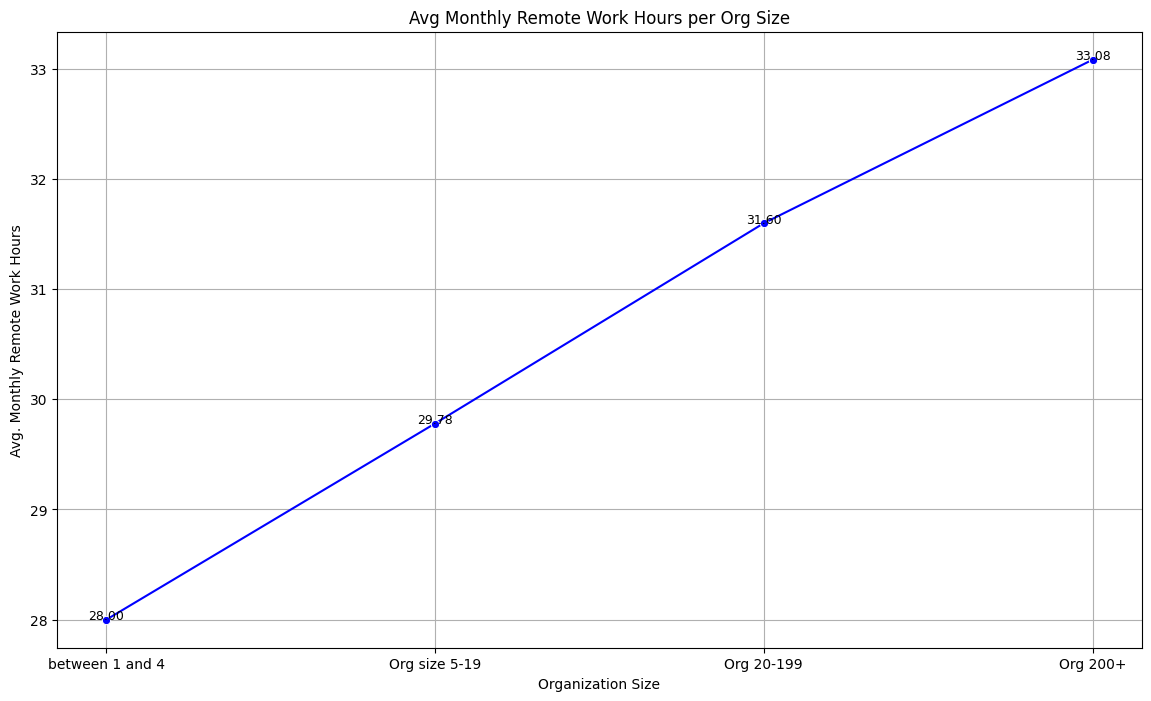

In [17]:
# Define the categories for organization size in the desired order
categories = ['between 1 and 4', 'Org size 5-19', 'Org 20-199', 'Org 200+']

# Mapping organization sizes to categories
def map_org_size(org_size):
    if '1 and 4' in org_size:
        return 'between 1 and 4'
    elif '5 and 19' in org_size:
        return 'Org size 5-19'
    elif '20 and 199' in org_size:
        return 'Org 20-199'
    elif '200' in org_size:
        return 'Org 200+'
    else:
        return 'Other'

data['org_size_category'] = data['organization_size'].apply(map_org_size)
filtered_data = data[data['org_size_category'].isin(categories)]

# Calculate monthly remote work hours (make sure this is executed)
filtered_data['monthly_remote_work_hours'] = filtered_data['remote_hours_working'] * 4  # Assuming 4 weeks in a month

# Calculate the average monthly remote work hours per category
org_size_data = filtered_data.groupby('org_size_category')['monthly_remote_work_hours'].mean().reindex(categories).reset_index()

# Plotting the line chart using both matplotlib and seaborn
plt.figure(figsize=(14, 8))

sns.lineplot(x='org_size_category', y='monthly_remote_work_hours', data=org_size_data, marker='o', color='b')

# Adding data labels
for x, y in zip(org_size_data['org_size_category'], org_size_data['monthly_remote_work_hours']):
    plt.text(x, y, f'{y:.2f}', fontsize=9, ha='center')

plt.title('Avg Monthly Remote Work Hours per Org Size')
plt.xlabel('Organization Size')
plt.ylabel('Avg. Monthly Remote Work Hours')
plt.grid(True)
plt.show()


<ipython-input-18-92365bd2b6a0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Work Type', y='Total Hours', data=org_size_200_data, palette=['#98FB98', '#228B22'])


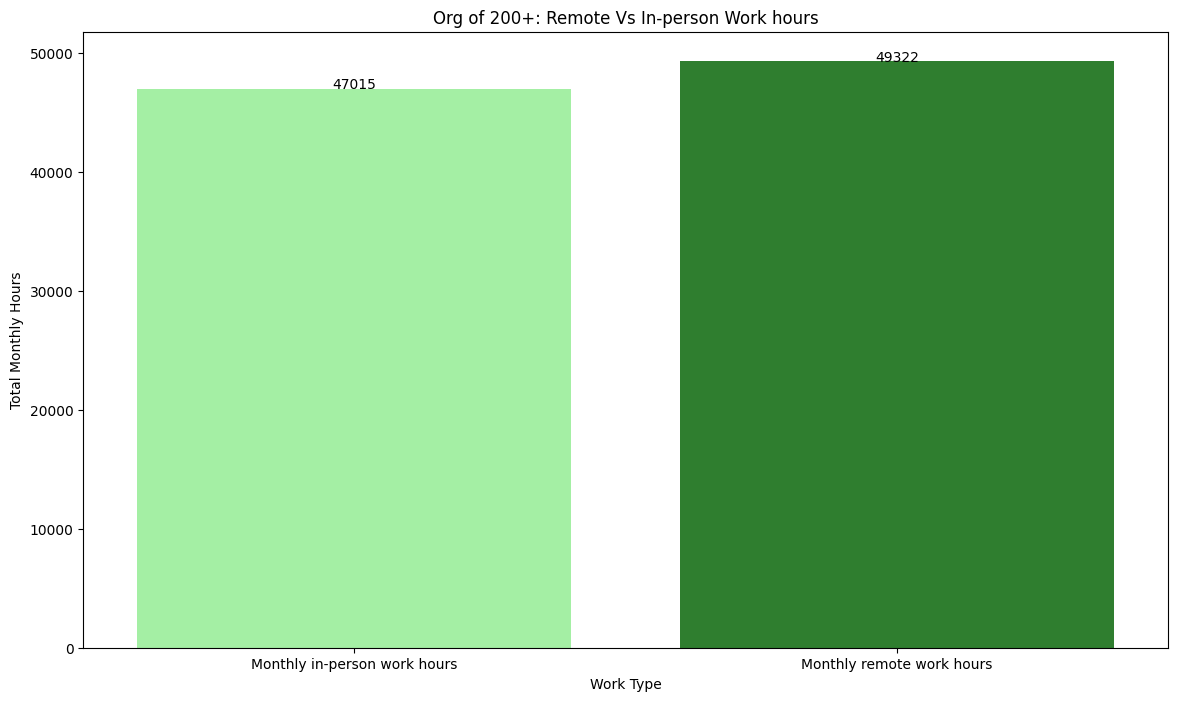

In [18]:
# Fix the syntax error in the plt.text function
# Filter data for organization size 200+
org_size_200_plus = data[data['org_size_category'] == 'Org 200+']

# Calculate total monthly in-person and remote work hours for organization size 200+
total_monthly_inperson_hours = org_size_200_plus['monthly_inperson_work_hours'].sum()
total_monthly_remote_hours = org_size_200_plus['monthly_remote_work_hours'].sum()

# Creating the dataset for the bar plot
org_size_200_data = pd.DataFrame({
    'Work Type': ['Monthly in-person work hours', 'Monthly remote work hours'],
    'Total Hours': [total_monthly_inperson_hours, total_monthly_remote_hours]
})

# Plotting the bar chart using both matplotlib and seaborn
plt.figure(figsize=(14, 8))

sns.barplot(x='Work Type', y='Total Hours', data=org_size_200_data, palette=['#98FB98', '#228B22'])

# Adding data labels
for index, row in org_size_200_data.iterrows():
    plt.text(index, row['Total Hours'], f'{row["Total Hours"]:.0f}', color='black', ha="center")

plt.title('Org of 200+: Remote Vs In-person Work hours')
plt.xlabel('Work Type')
plt.ylabel('Total Monthly Hours')
plt.show()


## Remote Work Preference

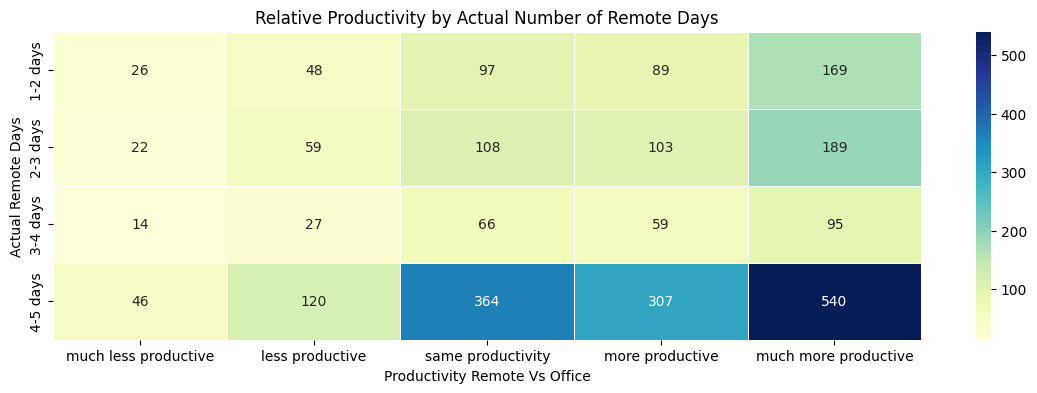

In [ ]:

# Define the categories for actual remote days in the desired order
categories = ['1-2 days', '2-3 days', '3-4 days', '4-5 days']
productivity_categories = ['much less productive', 'less productive', 'same productivity', 'more productive', 'much more productive']

# Mapping Actual Remote Days to categories
def map_remote_days(remote_days):
    if remote_days == '1-2 days':
        return '1-2 days'
    elif remote_days == '2-3 days':
        return '2-3 days'
    elif remote_days == '3-4 days':
        return '3-4 days'
    elif remote_days == '4-5 days':
        return '4-5 days'
    else:
        return 'Other'

# Apply the mapping function
data['remote_days_category'] = data['actual_remote_days'].apply(map_remote_days)
filtered_data = data[data['remote_days_category'].isin(categories)]

# Pivot the data to create a matrix for the heatmap
pivot_data = filtered_data.pivot_table(
    values='responder_id',
    index='remote_days_category',
    columns='productivity_remote_vs_office',
    aggfunc='count',
    fill_value=0
)

# Ensure the correct order of columns and rows
pivot_data = pivot_data.reindex(index=categories, columns=productivity_categories)

# Plotting the heatmap using both matplotlib and seaborn
plt.figure(figsize=(14, 4))
sns.heatmap(pivot_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Relative Productivity by Actual Number of Remote Days')
plt.xlabel('Productivity Remote Vs Office')
plt.ylabel('Actual Remote Days')
plt.show()


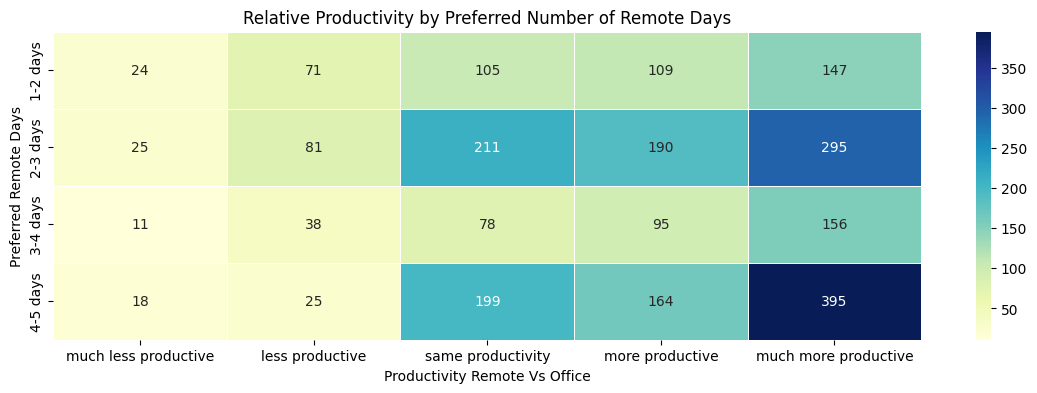

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the categories for preferred remote days in the desired order
categories = ['1-2 days', '2-3 days', '3-4 days', '4-5 days']
productivity_categories = ['much less productive', 'less productive', 'same productivity', 'more productive', 'much more productive']

# Mapping Preferred Remote Days to categories
def map_preferred_remote_days(preferred_days):
    if preferred_days == '1-2 days':
        return '1-2 days'
    elif preferred_days == '2-3 days':
        return '2-3 days'
    elif preferred_days == '3-4 days':
        return '3-4 days'
    elif preferred_days == '4-5 days':
        return '4-5 days'
    else:
        return 'Other'

# Apply the mapping function
data['preferred_days_category'] = data['preferred_rw_percentage_future'].apply(map_preferred_remote_days)
filtered_data = data[data['preferred_days_category'].isin(categories)]

# Pivot the data to create a matrix for the heatmap
pivot_data = filtered_data.pivot_table(
    values='responder_id',
    index='preferred_days_category',
    columns='productivity_remote_vs_office',
    aggfunc='count',
    fill_value=0
)

# Ensure the correct order of columns and rows
pivot_data = pivot_data.reindex(index=categories, columns=productivity_categories)

# Plotting the heatmap using both matplotlib and seaborn
plt.figure(figsize=(14, 4))
sns.heatmap(pivot_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Relative Productivity by Preferred Number of Remote Days')
plt.xlabel('Productivity Remote Vs Office')
plt.ylabel('Preferred Remote Days')
plt.show()


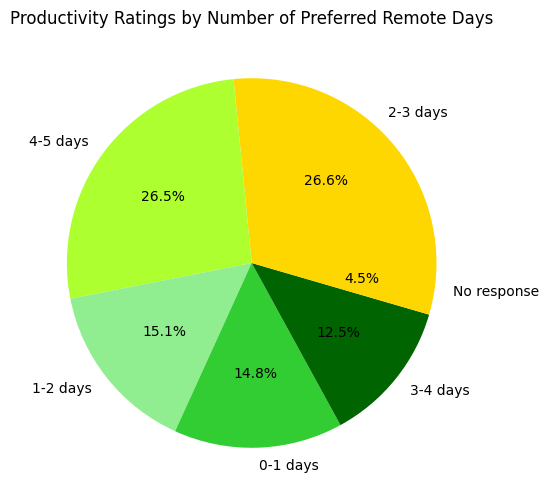

In [ ]:
# Calculate the count of each preferred remote days category
preferred_days_counts = data['preferred_rw_percentage_future'].value_counts()

# Plotting the pie chart using both matplotlib and seaborn
plt.figure(figsize=(10, 6))

# Define a color palette for the categories
colors = ['#FFD700', '#ADFF2F', '#90EE90', '#32CD32', '#006400']

# Create the pie chart
plt.pie(preferred_days_counts, labels=preferred_days_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Productivity Ratings by Number of Preferred Remote Days')
plt.show()


## Time spent

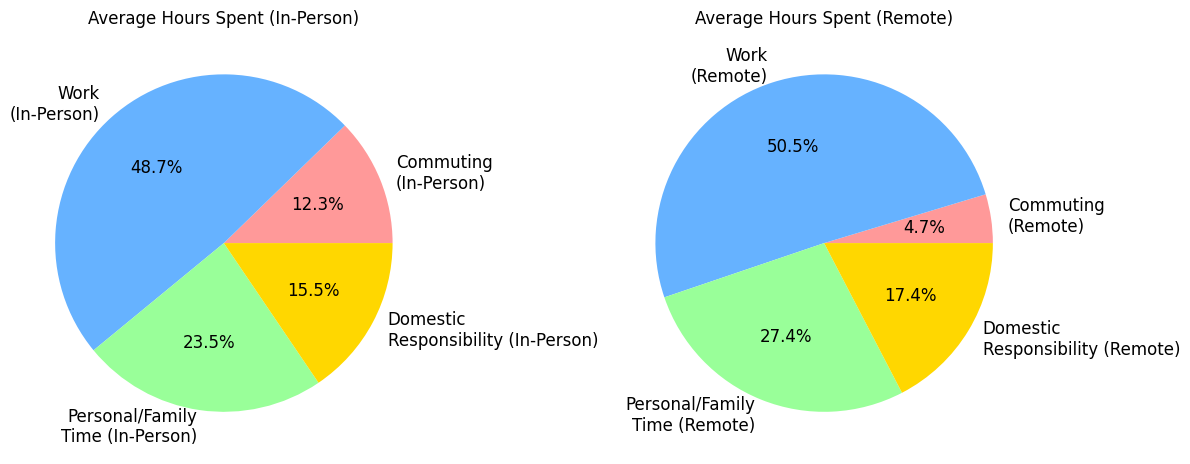

In [ ]:
# Create the pie charts with increased size and wrapped text for clarity

# Calculate the averages for in-person hours categories
average_inperson_commuting = data['inperson_hours__commuting'].mean()
average_inperson_working = data['inperson_hours__working'].mean()
average_inperson_personal_family_time = data['inperson_hours__personal_family_time'].mean()
average_inperson_domestic_responsibilities = data['inperson_hours_domestic_responsibilities'].mean()

# Labels for the in-person pie chart
inperson_labels = [
    'Commuting\n(In-Person)',
    'Work\n(In-Person)',
    'Personal/Family\nTime (In-Person)',
    'Domestic\nResponsibility (In-Person)'
]
inperson_sizes = [average_inperson_commuting, average_inperson_working, average_inperson_personal_family_time, average_inperson_domestic_responsibilities]
inperson_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(inperson_sizes, labels=inperson_labels, autopct='%1.1f%%', colors=inperson_colors, textprops={'fontsize': 12})
plt.title('Average Hours Spent (In-Person)')

# Calculate the averages for remote hours categories
average_remote_commuting = data['remote_hours_commuting'].mean()
average_remote_working = data['remote_hours_working'].mean()
average_remote_personal_family_time = data['remote_hours_personal_family_time'].mean()
average_remote_domestic_responsibilities = data['remote_hours_domestic_responsibilities'].mean()

# Labels for the remote pie chart
remote_labels = [
    'Commuting\n(Remote)',
    'Work\n(Remote)',
    'Personal/Family\nTime (Remote)',
    'Domestic\nResponsibility (Remote)'
]
remote_sizes = [average_remote_commuting, average_remote_working, average_remote_personal_family_time, average_remote_domestic_responsibilities]
remote_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700']

plt.subplot(1, 2, 2)
plt.pie(remote_sizes, labels=remote_labels, autopct='%1.1f%%', colors=remote_colors, textprops={'fontsize': 12})
plt.title('Average Hours Spent (Remote)')

plt.tight_layout()
plt.show()


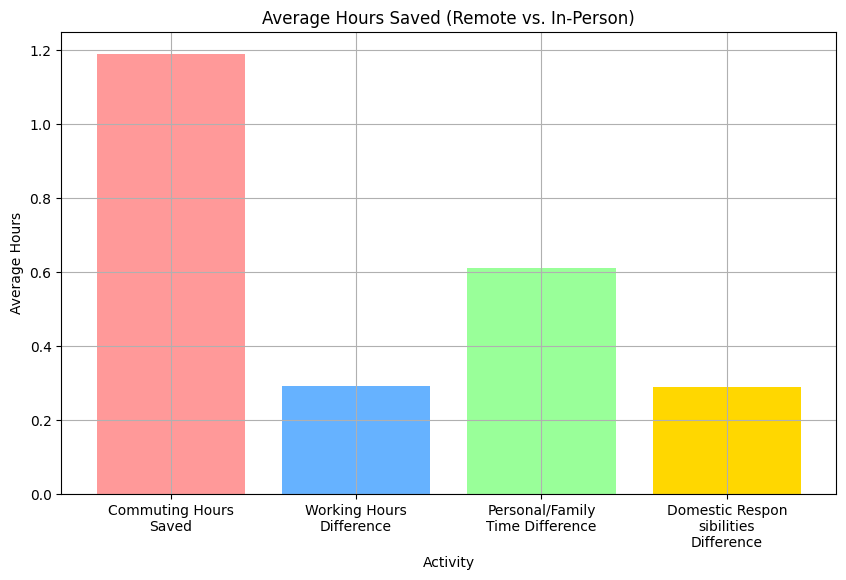

In [19]:
# Calculate the difference in hours between remote and in-person work for commuting, working, personal/family time, and domestic responsibilities
data['commuting_hours_saved'] = data['inperson_hours__commuting'] - data['remote_hours_commuting']
data['working_hours_difference'] = data['remote_hours_working'] - data['inperson_hours__working']
data['personal_family_time_difference'] = data['remote_hours_personal_family_time'] - data['inperson_hours__personal_family_time']
data['domestic_responsibilities_difference'] = data['remote_hours_domestic_responsibilities'] - data['inperson_hours_domestic_responsibilities']

# Calculate the average differences
average_differences = {
    'Commuting Hours Saved': data['commuting_hours_saved'].mean(),
    'Working Hours Difference': data['working_hours_difference'].mean(),
    'Personal/Family Time Difference': data['personal_family_time_difference'].mean(),
    'Domestic Responsibilities Difference': data['domestic_responsibilities_difference'].mean()
}

import textwrap

# Wrap text for x-axis labels
wrapped_labels = [ '\n'.join(textwrap.wrap(label, 15)) for label in average_differences.keys()]

# Create a bar plot to show the average differences with wrapped labels
plt.figure(figsize=(10, 6))
plt.bar(wrapped_labels, average_differences.values(), color=['#FF9999', '#66B2FF', '#99FF99', '#FFD700'])

# Adding labels and title
plt.xlabel('Activity')
plt.ylabel('Average Hours')
plt.title('Average Hours Saved (Remote vs. In-Person)')
plt.grid(True)
plt.show()
